In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
# constraints
sample_nums = 100
feature_nums = 1
random_state = 42

learning_rate = 0.01
iterations = 1000
convergence_tol = 1e-6
normalize = False

test_size = 0.2


In [297]:
# generate data
def generate_data(sample_nums=sample_nums, feature_nums=feature_nums):
    np.random.seed(random_state)
    #X = np.linspace(0, 10, sample_nums).reshape(-1, 1)
    X = np.random.randn(sample_nums, 1) 
    #true_w = np.random.randn(feature_nums, 1)
    #true_b = np.random.randn()
    noise = np.random.randn(sample_nums, 1) * 2  # add confusion  
    y = 3 * X + 5 + noise
    return X, y

X, y = generate_data(sample_nums=sample_nums, feature_nums=feature_nums)
print(X.shape, y.shape)

(100, 1) (100, 1)


In [298]:
# model
class LinearRegression:
    def __init__(self, learning_rate, iterations, convergence_tol, normalize):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.convergence_tol = convergence_tol
        self.normalize = normalize
        self.w = None
        self.b = 0
        self.X_mean = None
        self.X_std = None
        self.losses = []

    def standardize(self, X, is_fit=False):
        if self.normalize:
            if is_fit or self.X_mean is None or self.X_std is None:
                self.X_mean = np.mean(X, axis=0)
                self.X_std = np.std(X, axis=0)
            return (X - self.X_mean) / self.X_std
        return X
    
    def predict(self, X):
        if self.normalize and self.X_mean is not None:
            X = (X - self.X_mean) / self.X_std
        return X @ self.w + self.b
    
    def fit (self, X, y):
        X = self.standardize(X, is_fit=True)
        y = y.reshape(-1, 1)

        sample_nums, feature_nums = X.shape
        self.w = np.zeros((feature_nums, 1))

        for i in range(self.iterations):
            y_pred = self.predict(X)
            error = y - y_pred
            mse = np.mean(error ** 2)
            self.losses.append(mse)

            if i > 0 and abs(self.losses[-1] - self.losses[-2]) < self.convergence_tol:
                break

            dw = (-2 / sample_nums) * (X.T @ error)
            db = (-2 / sample_nums) * np.sum(error)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db



In [299]:
# split
def train_test_split(X, y, test_size, random_state):
    if random_state:
        np.random.seed(random_state)
        
    sample_nums = X.shape[0]
    indices = np.arange(sample_nums)
    np.random.shuffle(indices)

    test_count = int(sample_nums * test_size)
    train_index = indices[test_count:]
    test_index = indices[:test_count]

    return X[train_index], X[test_index], y[train_index], y[test_index]

In [300]:
# train
X, y = generate_data(sample_nums=sample_nums, feature_nums=feature_nums)

data = np.hstack([X, y])
df = pd.DataFrame(data, columns=[f"X{i+1}" for i in range(X.shape[1])] + ["y"])

df.to_csv("generated_data.csv", index=False)

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

linear_model = LinearRegression(learning_rate=learning_rate, iterations=iterations, convergence_tol=convergence_tol, normalize=True)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_train)

print(f"Weight: {linear_model.w.flatten()}, Bias: {linear_model.b}")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Weight: [2.34747375], Bias: 4.405098385864372
(80, 1) (80, 1)
(20, 1) (20, 1)


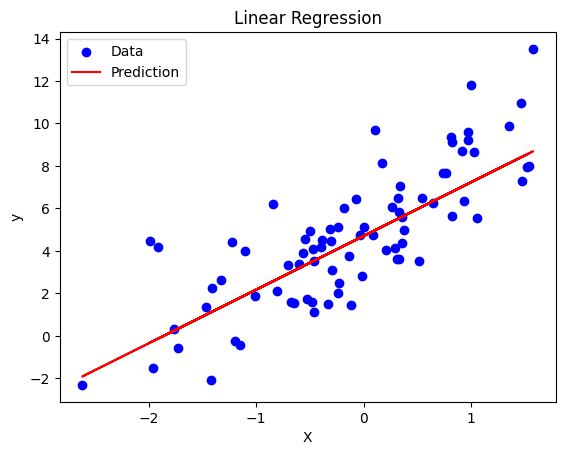

In [302]:
# evaluate
def plot_linear_regression(X, y, y_pred):
    plt.scatter(X, y, color="blue", label="Data")
    plt.plot(X, y_pred, color="red", label="Prediction")
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title("Linear Regression")
    plt.show()

plot_linear_regression(X_train, y_train, y_pred)


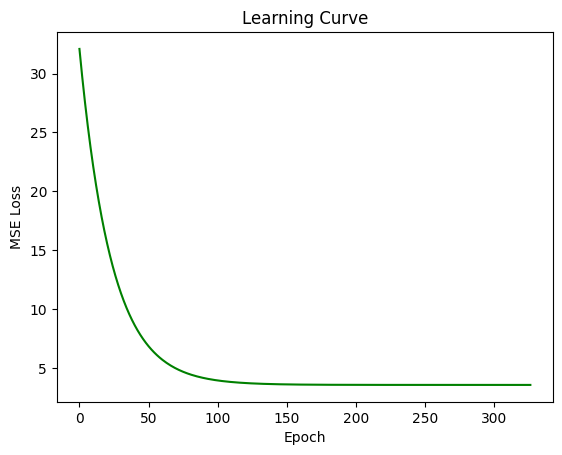

In [303]:
def plot_learning_curve(linear_model):
    plt.plot(range(len(linear_model.losses)), linear_model.losses, color="green")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Learning Curve")
    plt.show()

plot_learning_curve(linear_model)

Theta (bias, weight): [4.43019232 3.40804535]


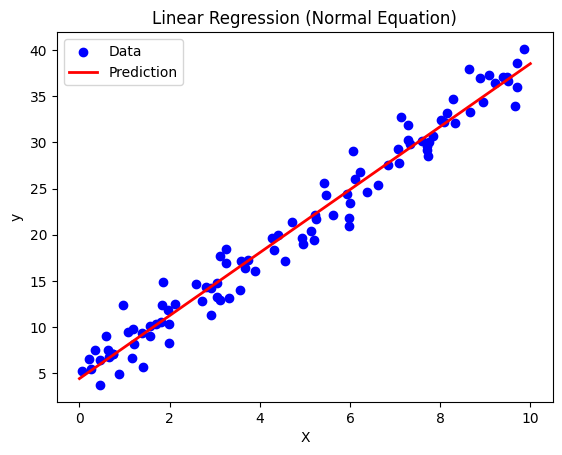

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Normal Equation

np.random.seed(42)
sample_nums = 100

X = 2 * np.random.rand(sample_nums, 1) * 5   
true_w = 3.5
true_b = 4
noise = np.random.randn(sample_nums, 1) * 2

y = true_w * X + true_b + noise

X_b = np.c_[np.ones((sample_nums, 1)), X]   

# Normal Equation: theta = (X^T X)^(-1) X^T y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta (bias, weight):", theta_best.ravel())

X_new = np.linspace(0, 10, 100).reshape(-1, 1)
X_new_b = np.c_[np.ones((100, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.scatter(X, y, color="blue", label="Data")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression (Normal Equation)")
plt.legend()
plt.show()
